# **Task 6: To predict the right class of the data provided to the classifier**

## By: Deboleena Bhatacharyya

###  **Prediction using Decision Tree Algorithm**

## Step 1: Importing and loading the dataset

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Load the iris dataset
iris = pd.read_csv("Iris.csv")
iris.head()



,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


####  Check if any null variable is present or not

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.drop('Id',axis=1,inplace=True)

#### Check for the correlation of each variable

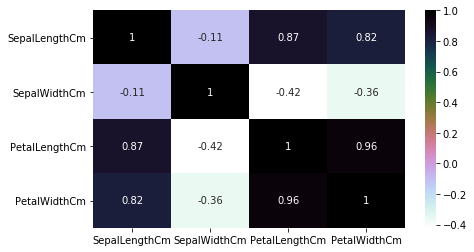

In [6]:
import seaborn as sns
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r')  
plt.show()

the above visualization implies that, if we take Petal length and width, these two variables are highly correlated where as sepal length and width are not correlated to each oher.

## Step 2: Separating training and testing model

In [7]:
# in this our main data is split into train and test
train, test = train_test_split(iris, test_size = 0.3)
# test_size=0.3 splits the data into 70% and 30% ratio. 
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [8]:
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values# taking the training data features
y_train=train.Species# output of our training data
X_test= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values # taking test data features
y_test =test.Species   #output value of test data

In [9]:
X_train[1:5]

array([[5. , 3.2, 1.2, 0.2],
       [5.8, 2.7, 4.1, 1. ],
       [5.7, 2.5, 5. , 2. ],
       [6.8, 3. , 5.5, 2.1]])

In [10]:
y_train.head()

54     Iris-versicolor
35         Iris-setosa
67     Iris-versicolor
113     Iris-virginica
112     Iris-virginica
Name: Species, dtype: object

Checking the accuracy of the decision tree

In [11]:
from sklearn import metrics
model=DecisionTreeClassifier(criterion='gini',random_state=100)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.9777777777777777


In [12]:
print("Confusion Matrix:",confusion_matrix(y_test,prediction))

Confusion Matrix: [[20  0  0]
 [ 0 14  0]
 [ 0  1 10]]


## Step 3: Visualizing the Decision Tree

#### Install required libraries
!pip install pydotplus

!apt-get install graphviz -y

In [17]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [18]:
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [19]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



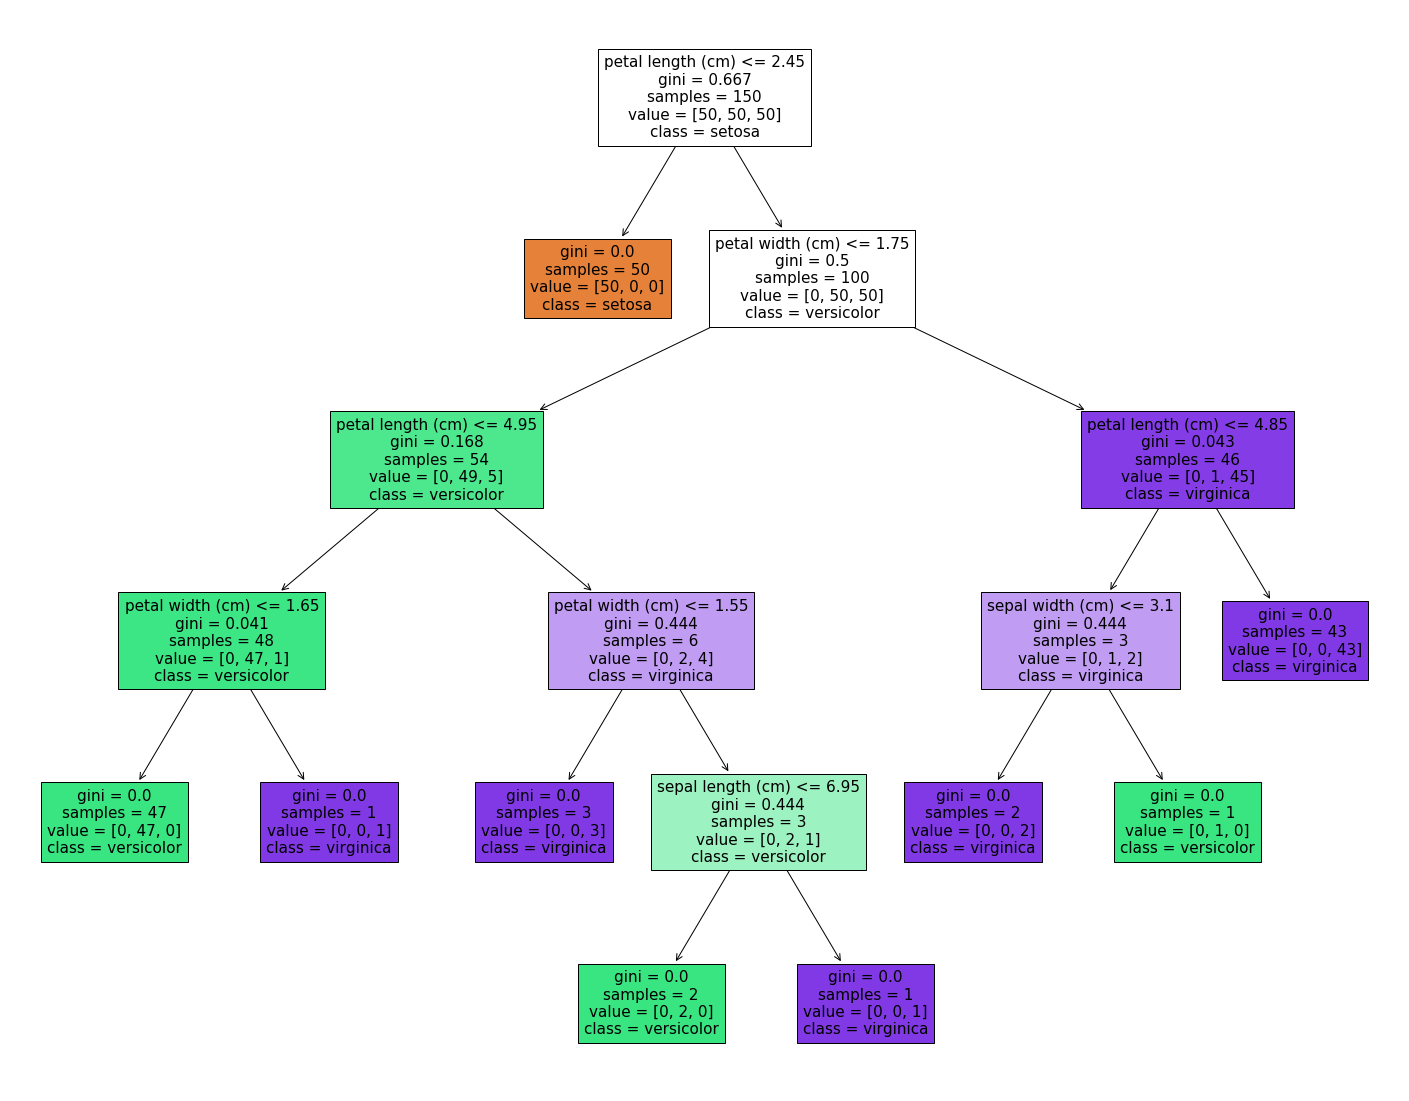

In [21]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)